In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
np.random.seed(50)

In [3]:
def true_function():
    t = np.linspace(0, 1, 100)
    s=[]
    for i in range(0,100):
        s.append(np.sin(2 * np.pi * t[i]))
    plt.plot(t, s, label='True function', color='black')

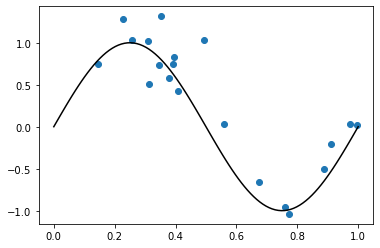

In [4]:
x_data = np.random.uniform(0,1,20)
N = np.random.normal(0, 1, 20)
y_data = np.sin(2 * np.pi * x_data) + N * 0.3
plt.scatter(x_data, y_data)
true_function()

In [3]:
def generate_data(x):
    return np.sin(2 * np.pi * x) + np.random.normal(0, 1) * 0.3

In [4]:
x_data = []
x_data = np.random.uniform(0, 1, 20)

In [5]:
y_data = []
for x in x_data:
    val = generate_data(x)
    y_data.append(val)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

x_train, y_train = zip(*sorted(zip(x_train, y_train)))
x_test, y_test = zip(*sorted(zip(x_test, y_test)))

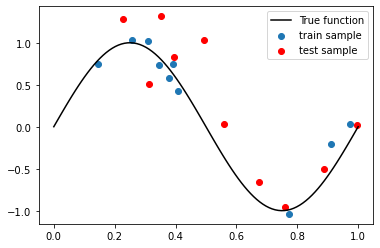

In [6]:
plt.scatter(x_train, y_train, label = 'train sample')
plt.scatter(x_test, y_test, c = 'r',label = 'test sample')
true_function()
plt.legend()

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import minmax_scale

In [8]:
train_error = []
test_error = []

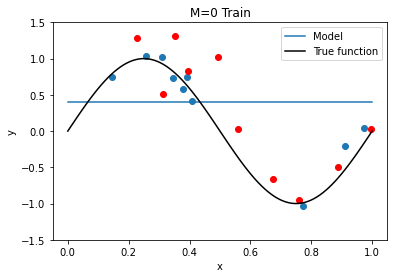

In [9]:
polynomial_features = PolynomialFeatures(0)
x_reshape= polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model0 = LinearRegression()
model0.fit(x_reshape, y_train)

x = np.linspace(0, 1, 100)
x_reshape = polynomial_features.fit_transform(x.reshape(-1, 1))
y = model0.predict(x_reshape)
plt.plot(x, y,label="Model")
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, c = 'r')
true_function()
plt.title('M=0 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

# polynomial_features = PolynomialFeatures(degree=0)
# x_train_poly = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
# x_test_poly = polynomial_features.fit_transform(np.asarray(x_test).reshape(-1, 1))

# model0 = LinearRegression()
# model0.fit(x_train_poly, y_train)
# y_train_pred = model0.predict(x_train_poly)

# rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# train_error.append(rmse)
# print("RMSE : ", rmse)

# plt.scatter(x_train, y_train, s=25, label='Samples', color='orange')
# plt.plot(x_train, y_train_pred, color='red', label='Model')
# true_function()
# plt.title('M=0 Train')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc='upper right')
# plt.show()

# y_test_pred = model0.predict(x_test_poly)
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# test_error.append(test_rmse)

# plt.scatter(x_test, y_test, s=25)
# plt.plot(x_test, y_test_pred, color='m')
# true_function()
# plt.title('M=0 Test')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

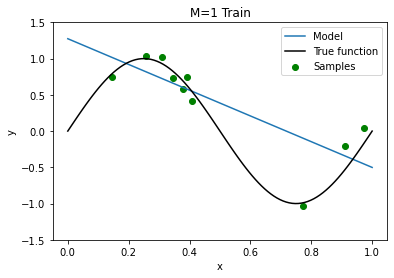

In [10]:
polynomial_features = PolynomialFeatures(1)
x_reshape= polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model1 = LinearRegression()
model1.fit(x_reshape, y_train)

x = np.linspace(0, 1, 100)
x_reshape = polynomial_features.fit_transform(x.reshape(-1, 1))
y = model1.predict(x_reshape)
plt.plot(x, y,label="Model")
plt.scatter(x_train, y_train, c='green', label='Samples')
true_function()
plt.title('M=1 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

# polynomial_features = PolynomialFeatures(degree=1)
# x_train_poly = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
# x_test_poly = polynomial_features.fit_transform(np.asarray(x_test).reshape(-1, 1))

# model1 = LinearRegression()
# model1.fit(x_train_poly, y_train)
# y_train_pred = model1.predict(x_train_poly)

# rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# print("RMSE : ", rmse)

# plt.scatter(x_train, y_train, s=25, label='Samples', color='orange')
# plt.plot(x_train, y_train_pred, color='red', label='Model')
# true_function()
# plt.title('M=1 Train')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc='upper right')
# plt.show()

# y_test_pred = model1.predict(x_test_poly)
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# test_error.append(test_rmse)

# plt.scatter(x_test, y_test, s=25)
# plt.plot(x_test, y_test_pred, color='m')
# true_function()
# plt.title('M=1 Test')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

[ 0.         -1.77574032]


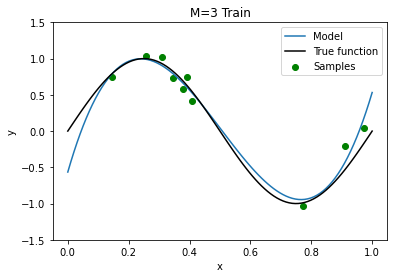

In [11]:
polynomial_features = PolynomialFeatures(3)
x_reshape= polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model3 = LinearRegression()
model3.fit(x_reshape, y_train)
print(model1.coef_)

x = np.linspace(0, 1, 100)
x_reshape = polynomial_features.fit_transform(x.reshape(-1, 1))
y = model3.predict(x_reshape)
plt.plot(x, y,label="Model")
plt.scatter(x_train, y_train, c='green', label='Samples')
true_function()
plt.title('M=3 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

# polynomial_features = PolynomialFeatures(degree=3)
# x_train_poly = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
# x_test_poly = polynomial_features.fit_transform(np.asarray(x_test).reshape(-1, 1))

# model3 = LinearRegression()
# model3.fit(x_train_poly, y_train)
# y_train_pred = model3.predict(x_train_poly)

# rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# print("RMSE : ", rmse)


# plt.scatter(x_train, y_train, s=25, label='Samples', color='orange')
# plt.plot(x_train, y_train_pred, color='red', label='Model')
# true_function()
# plt.title('M=3 Train')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc='upper right')
# plt.show()

# y_test_pred = model3.predict(x_test_poly)
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# test_error.append(test_rmse)

# plt.scatter(x_test, y_test, s=25)
# plt.plot(x_test, y_test_pred, color='m')
# true_function()
# plt.title('M=3 Test')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

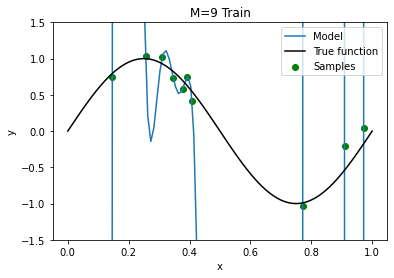

In [12]:
polynomial_features = PolynomialFeatures(9)
x_reshape= polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model9 = LinearRegression()
model9.fit(x_reshape, y_train)

x = np.linspace(0, 1, 100)
x_reshape = polynomial_features.fit_transform(x.reshape(-1, 1))
y = model9.predict(x_reshape)
plt.plot(x, y, label="Model")
plt.scatter(x_train, y_train, c='green', label='Samples')
plt.ylim(-1.5 ,1.5)
true_function()
plt.title('M=9 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

# polynomial_features = PolynomialFeatures(degree=9)
# x_train_poly = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
# x_test_poly = polynomial_features.fit_transform(np.asarray(x_test).reshape(-1, 1))

# model9 = LinearRegression()
# model9.fit(x_train_poly, y_train)
# y_train_pred = model9.predict(x_train_poly)

# rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
# print("RMSE : ", rmse)

# plt.scatter(x_train, y_train, s=25, label='Samples', color='orange')
# plt.plot(x_train, y_train_pred, color='red', label='Model')
# true_function()
# plt.title('M=9 Train')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.legend(loc='upper right')
# plt.show()

# y_test_pred = model9.predict(x_test_poly)
# test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
# # test_error.append(test_rmse)

# plt.scatter(x_test, y_test, s=25)
# plt.plot(x_train, y_test_pred, color='m')
# true_function()
# plt.title('M=9 Test')
# plt.xlabel('x')
# plt.ylim(-1.5 ,1.5)
# plt.ylabel('y')
# plt.show()

In [13]:
def gen_train_test_loss():
    train_error = []
    test_error = []
    for i in range(0, 10):
#         poly_features = PolynomialFeatures(i)
#         X_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
#         poly_model = LinearRegression()
#         poly_model.fit(X_train_poly, y_train)
#         y_train_predicted = poly_model.predict(X_train_poly)
#         rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
#         train_error.append(rmse_train)
#         rmse_test = np.sqrt(mean_squared_error(y_test, poly_model.predict(poly_features.fit_transform(x_test.reshape(-1, 1)))))
#         test_error.append(rmse_test)
        polynomial_features = PolynomialFeatures(degree=i)
        x_train_poly = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
        x_test_poly = polynomial_features.fit_transform(np.asarray(x_test).reshape(-1, 1))

        poly_model = LinearRegression()
        poly_model.fit(x_train_poly, y_train)
        y_train_pred = poly_model.predict(x_train_poly)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_error.append(train_rmse)

        y_test_pred = poly_model.predict(x_test_poly)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_error.append(test_rmse)
    
    return train_error, test_error

train_error, test_error = gen_train_test_loss()
# train_error = minmax_scale(train_error, feature_range=(0, 1))
# test_error = minmax_scale(test_error, feature_range=(0, 1))

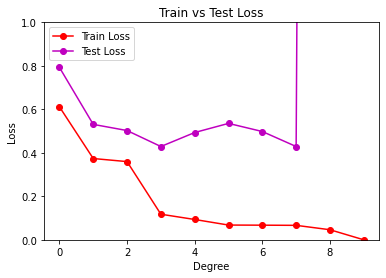

In [14]:
plt.plot(np.arange(0, 10, 1), train_error, color='r', label='Train Loss', marker='o')
plt.plot(np.arange(0, 10, 1), test_error, color='m', label='Test Loss', marker='o')
plt.title('Train vs Test Loss')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.show()

In [15]:
weights_frame = pd.DataFrame(np.ndarray((10,5)))
weights_frame.columns = ['weights','M=0','M=1','M=3','M=9']
weights_frame['weights'] = ['W'+str(index) for index in range(10)]

weights_frame['M=0'] = model0.coef_.tolist() + [0]*(10-len(model0.coef_))
weights_frame['M=1'] = model1.coef_.tolist() + [0]*(10-len(model1.coef_))
weights_frame['M=3'] = model3.coef_.tolist() + [0]*(10-len(model3.coef_))
weights_frame['M=9'] = model9.coef_.tolist() + [0]*(10-len(model9.coef_))

with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(weights_frame.replace(0,'-').head(10))

  weights M=0   M=1    M=3           M=9
0      W0   -     -      -             -
1      W1   - -1.78  14.58     721342.20
2      W2   -     - -39.96   -7789519.57
3      W3   -     -  26.48   46975184.23
4      W4   -     -      - -174593206.40
5      W5   -     -      -  414803807.75
6      W6   -     -      - -629618643.45
7      W7   -     -      -  588415338.42
8      W8   -     -      - -307277385.76
9      W9   -     -      -   68395524.44


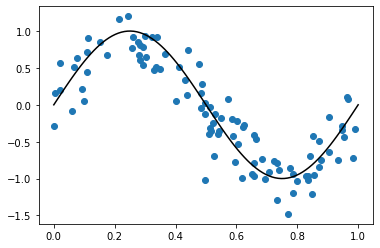

In [21]:
x_data_100 = np.random.uniform(0,1, 100)
N_100 = np.random.normal(0, 1, 100)
y_data_100 = np.sin(2 * np.pi * x_data_100) + N_100 * 0.3
plt.scatter(x_data_100, y_data_100)
true_function()

x_data_100, y_data_100 = zip(*sorted(zip(x_data_100, y_data_100)))

RMSE :  0.2573300156027519


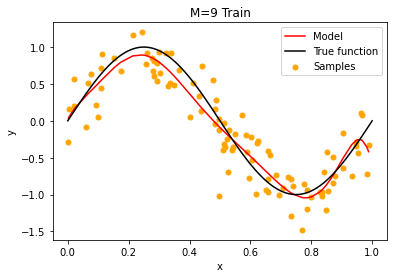

In [24]:
polynomial_features = PolynomialFeatures(degree=9)
x_train_poly_100 = polynomial_features.fit_transform(np.asarray(x_data_100).reshape(-1, 1))
# x_test_poly = polynomial_features.fit_transform(x_test.reshape(-1, 1))

model9 = LinearRegression()
model9.fit(x_train_poly_100, y_data_100)
y_train_pred = model9.predict(x_train_poly_100)

rmse = np.sqrt(mean_squared_error(y_data_100, y_train_pred))
print("RMSE : ", rmse)

plt.scatter(x_data_100, y_data_100, s=25, label='Samples', color='orange')
# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x_data_100, y_train_pred), key=sort_axis)
# x_train_plot, y_pred = zip(*sorted_zip)
plt.plot(x_data_100, y_train_pred, color='red', label='Model')
true_function()
plt.title('M=9 Train')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

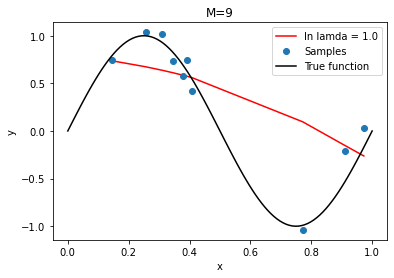

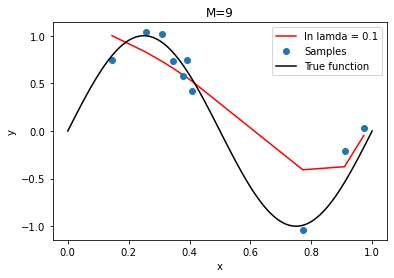

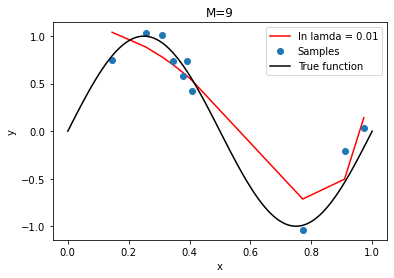

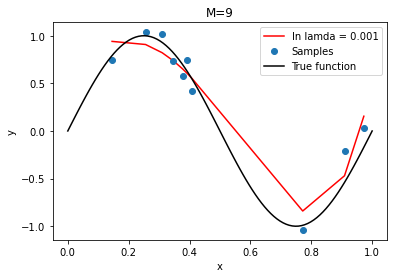

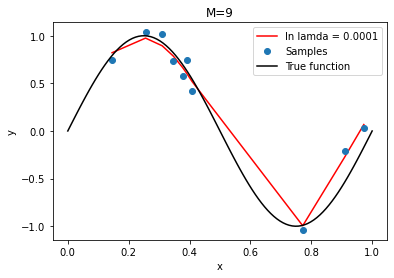

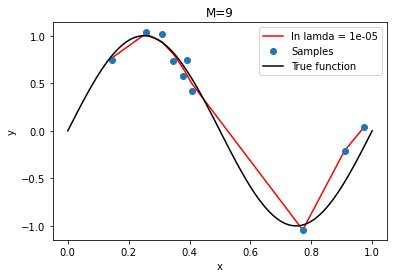

In [18]:
from sklearn.linear_model import Ridge

def plot_lam_graphs(deg, lambda_value):
    polynomial_features= PolynomialFeatures(degree = deg)
    X_Poly = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
    polynomial_features.fit(X_Poly, y_train)
    model = Ridge(alpha=lambda_value)
    fit = model.fit(X_Poly, y_train)
    
    X_poly_plot = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
    Y_pred = model.predict(X_poly_plot)
    plt.plot(x_train, Y_pred, color='r',label="ln lamda = "+str(lambda_value))
    plt.plot(x_train, y_train,'o',label='Samples')
    true_function()
    plt.xlabel('x')#xdata ranging from 0 to 1
    plt.ylabel('y')#t is the target yalue i.e value of y
    plt.title("M="+str(deg))#M no. of coeffecients
    plt.legend()
    plt.show()

lambda_values = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.00001])
for i in lambda_values:
    plot_lam_graphs(9, i)